## Multiple Chains

Runnables can easily be used to string together multiple Chains

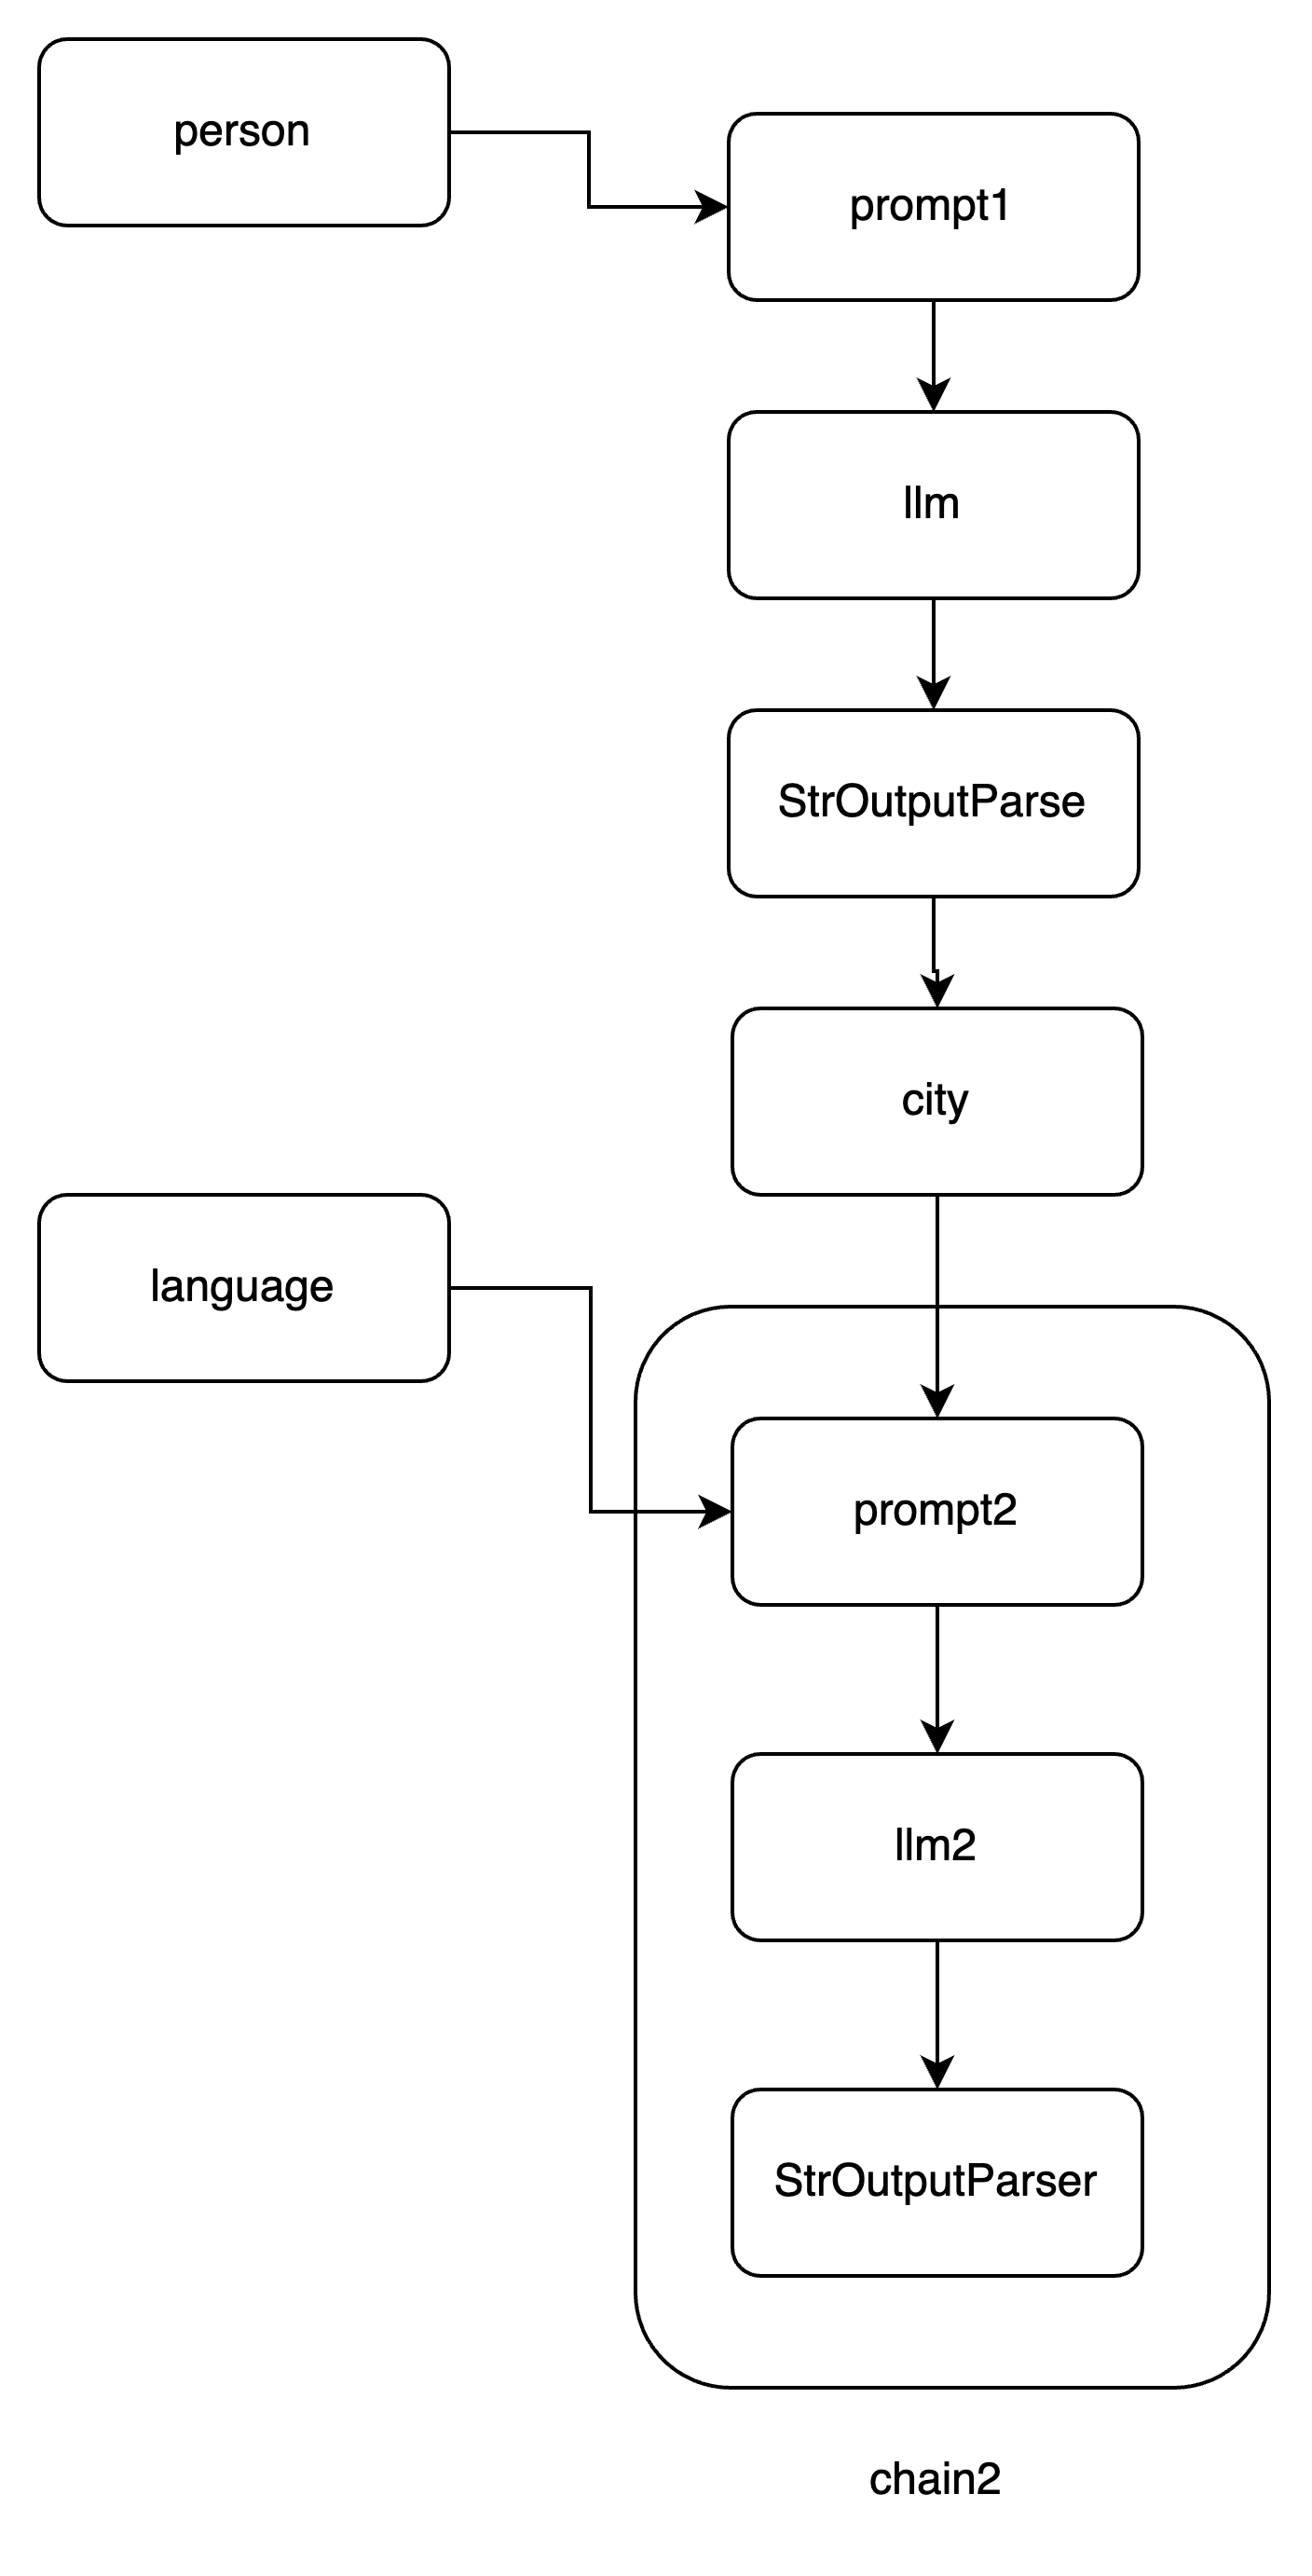

**StrOutputParser**
- OutputParser that parses LLMResult into the top likely string.
- Create a new model by parsing and validating input data from keyword arguments.
- Raises ValidationError if the input data cannot be parsed to form a valid model.


**Without StrOutputParser**
```bash
AIMessage(content='Barack Obama is from Chicago, Illinois.', response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 16, 'total_tokens': 25}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-5e8e7e44-b676-4308-933c-6aac70ab2c3d-0')
```

**With StrOutputParser()**
```bash
Barack Obama is from Chicago, Illinois
```

In [28]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from operator import itemgetter

In [29]:
prompt1 = ChatPromptTemplate.from_template("what is the city {person} is from?")
prompt2 = ChatPromptTemplate.from_template("What country is the city {city} in? response in {language}")

In [35]:
llm = ChatOpenAI(temperature=0)

chain1 = prompt1 | llm | StrOutputParser()
chain2 = (
    {"city": chain1, "language": itemgetter("language")} | prompt2 | llm | StrOutputParser()
)

chain2.invoke({"person": "obama", "language": "english"})

'The city mentioned in the prompt, Chicago, Illinois, is located in the United States.'

In [36]:
chain1.invoke({"person": "obama"})

AIMessage(content='Barack Obama is from Chicago, Illinois.', response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 16, 'total_tokens': 25}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-5e8e7e44-b676-4308-933c-6aac70ab2c3d-0')

## Branching & Merging

You may want the output of one component to be processed by 2 or more other components. RunnableParallels let you split or fork the chain so multiple components can process the input in parallel. Later, other components can join or merge the results to synthesize a final response. This type of chain creates a computation graph that looks like the following:

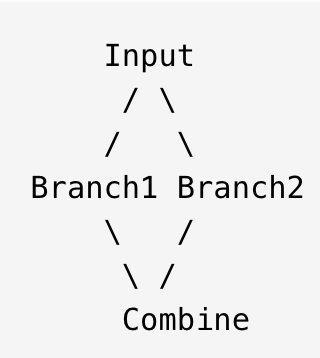

## Practice with Pipe

In [37]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

prompt = ChatPromptTemplate.from_template("tell me a joke about {topic}")
model = ChatOpenAI()

analysis_prompt = ChatPromptTemplate.from_template("is this a funny joke? {joke}")


story_chain = prompt | model | StrOutputParser()

compose_chain = {"joke": story_chain} | analysis_prompt |  model | StrOutputParser()
compose_chain.invoke({"topic": "bears"})


"Yes, this joke is funny because it plays on the stereotype that bears are slow-moving and clumsy, making it humorous that they wouldn't be able to catch fast food."